# TO DO LISTA
------------------
1. Opis zadania - *description of the task*
2. Uzyskanie danych - *getting the data*
3. Odkryć i zwizuwalizować dane, rozpoznać dodatkowe informacje **BRAK** - *explore data*
4. Przygotować dane pod względem algorytmów maszynowego uczenia - *transform data*
5. Wybrać i wyuczyć model - *choose and learn a model*
6. Dostroić model - *tune the model*
------------------
7. Zaprezentować rozwiązanie (vide - ocena modelu) - *evaluation of the model*
8. Przygotowć potok. Podzielić na katologi produkcyjne. Pokryć sieć testami jednostkowymi - *pipeline*
------------------
9. **Uruchomić (DOCKER | REST API)**, monitorować i utrzymać system - *launch docker*
------------------


1. **Opis zadania.** <br>
Celem zadania jest porównanie wyników uzyskanych w środowiskach **Matlab i TF**. Do jego osięgnięcia należy wykonać trening modelu zgodnie z obecnym stanem wiedzy. Jeżeli wynik **MSE** będzie porównywalny lub nie zostaną stwierdzone mankamenty modelu podstawowego `(2018)`, wykonany zostanie również krok **7, 8**. Krok **9** polega na uruchomieniu SSN z użyciem środowiska `Docker` i zapytania `REST API`. Przygotowanie do głównego zadania poprzedzono wykonanie dwóch etapów: <br><br>
**etap 1)** transfer `sieć opracowanej w środowisku Matlab` do języka python  (postać analityczna)<br><br>
**etap 2)** transfer współczyników W i b (wag i obciążeń) `do środowiska Keras`<br><br>
Każdorazowo wyniki predykcji były weryfikowane wględem pierwotnych wartości (sieć z 2018). Wykorzystanie `TF` ma na celu użycie technik opracowanych dla potrzeb głębokiego uczenia. Kryterium wyboru nowej sieci będzie `MSE_new > MSE_old` (przy założeniu prawidłowo uzyskanego modelu tj. brak przetrenowania itp.). <br><br>
(?) 
W notatniku *ANN_git.ipynb* zawarte jest porównanie sieci: **MinmaxScaler** - **tf MLP** - **MinmaxScaler**, MatlabScaler - tf MLP - MatlabScaler (funkcja). **tf MLP** oraz **MinmaxScaler** zostały utworzone z wag i obciążeń z Matlab,

2. **Uzyskanie danych**

    dane są nie pełne *(ponowne przeuczenie dla przykładów z lat 2018 - 2022)*
------------------

In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import OneHotEncoder
from datetime import datetime
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as measures

import keras_tuner as kt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from my_tools import hold_data
from my_tools import plot_train_via_neurons
from my_tools import plot_box_via_neurons
from my_tools import checker_dist_box

In [4]:
pd.read_excel('data_raw.xlsx', sheet_name = 'tabela', engine = 'openpyxl')

,Rodzaj skał stropowych,Wytrzymałość na rozciąganie,Spękania pionowe,Zawodnienie,Płaszczyzny osłabienia,Występowanie zaburzeń zalegania złoża,Średni postęp miesięczny frontu,Średni postęp mieś. likwidacji,"Występowanie zaszłości (stare wyrobiska, zroby)",Głębokość zalegania złoża,Rzeczywista szerokość,Długość kotwi,Dodatkowa obudowa,Czas istnienia wyrobiska,Opadnięcia elementów SRS,Rozwarstwienia stwierdzone badaniem endoskopowym,Predyspozycja,Możliwość utrzymania
0,5,11.80,0.0,0.3,0.0,0.0,18,18,0,1.10,17.5,1.8,0,3.5,0.0,0.0,1.00,1.0
1,4,9.60,0.0,0.3,0.5,0.5,30,30,0,0.85,12.0,1.6,2,6.0,0.0,1.5,1.00,1.0
2,56,9.30,0.0,0.0,0.0,0.6,8,8,75,0.95,11.6,1.8,5,1.0,0.0,0.0,1.00,1.0
3,4,8.70,1.0,0.3,0.0,0.0,0,0,0,1.02,10.0,2.6,3,4.0,0.0,4.6,1.00,1.0
4,4,9.70,0.0,0.0,0.5,1.0,0,0,0,0.74,7.0,1.8,0,6.0,0.0,2.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4,8.59,0.0,0.0,0.0,0.0,15,15,35,1.11,7.0,1.8,0,2.0,0.0,0.5,0.60,0.5
76,4,8.59,0.0,0.0,0.0,0.0,15,15,35,1.11,7.0,1.8,0,3.0,0.0,0.3,0.60,0.5
77,4,8.59,1.0,0.0,0.0,0.0,15,15,21,1.11,7.0,1.8,0,3.0,0.0,0.0,0.45,0.5
78,4,10.80,1.0,0.0,0.0,0.0,15,15,21,1.11,7.0,1.8,0,3.0,0.0,0.5,0.60,0.5


In [5]:
data = pd.read_csv('data_.csv', index_col = False)
data.head()

,TOP,Rr,CRv,HYDRO,WEAK,TECT,v_FR,v_LI,ZROBY,H,W,L,EXT,T,SRS,ENDO,CRFp,CRFm
0,5,11.8,0.0,0.3,0.0,0.0,18,18,0,1.10,17.5,1.8,0,3.5,0.0,0.0,1.0,1.0
1,4,9.6,0.0,0.3,0.5,0.5,30,30,0,0.85,12.0,1.6,2,6.0,0.0,1.5,1.0,1.0
2,56,9.3,0.0,0.0,0.0,0.6,8,8,75,0.95,11.6,1.8,5,1.0,0.0,0.0,1.0,1.0
3,4,8.7,1.0,0.3,0.0,0.0,0,0,0,1.02,10.0,2.6,3,4.0,0.0,4.6,1.0,1.0
4,4,9.7,0.0,0.0,0.5,1.0,0,0,0,0.74,7.0,1.8,0,6.0,0.0,2.0,1.0,1.0


In [6]:
data.describe()

,TOP,Rr,CRv,HYDRO,WEAK,TECT,v_FR,v_LI,ZROBY,H,W,L,EXT,T,SRS,ENDO,CRFp,CRFm
count,80.00000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000
mean,13.36250,8.735250,0.468750,0.160000,0.162500,0.167500,11.512500,13.075000,62.800000,1.108687,7.695000,1.82500,1.237500,3.618875,0.34750,1.051875,0.645625,0.650000
std,19.05106,1.452321,0.452446,0.281767,0.235665,0.291992,8.236986,9.815739,48.310546,0.084174,1.619728,0.15711,5.102106,1.961915,0.35166,1.053188,0.193681,0.225018
min,2.00000,5.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,6.400000,1.60000,0.000000,0.500000,0.00000,0.000000,0.400000,0.300000
25%,4.00000,8.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,21.000000,1.110000,7.000000,1.80000,0.000000,2.000000,0.00000,0.000000,0.450000,0.500000
50%,5.00000,9.000000,0.500000,0.000000,0.000000,0.000000,15.000000,15.000000,60.000000,1.110000,7.000000,1.80000,0.000000,3.000000,0.25000,1.050000,0.600000,0.500000
75%,6.00000,9.600000,1.000000,0.300000,0.500000,0.425000,20.000000,20.000000,90.000000,1.150000,7.575000,1.80000,1.000000,6.000000,0.50000,1.800000,0.800000,0.900000
max,56.00000,11.800000,1.000000,1.000000,0.500000,1.000000,30.000000,50.000000,190.000000,1.175000,17.500000,2.60000,45.000000,7.000000,1.00000,4.600000,1.000000,1.000000


3. Odkryć i zwizuwalizować dane, rozpoznać dodatkowe informacje
------------------

array([[<AxesSubplot:title={'center':'TOP'}>,
        <AxesSubplot:title={'center':'Rr'}>,
        <AxesSubplot:title={'center':'CRv'}>,
        <AxesSubplot:title={'center':'HYDRO'}>],
       [<AxesSubplot:title={'center':'WEAK'}>,
        <AxesSubplot:title={'center':'TECT'}>,
        <AxesSubplot:title={'center':'v_FR'}>,
        <AxesSubplot:title={'center':'v_LI'}>],
       [<AxesSubplot:title={'center':'ZROBY'}>,
        <AxesSubplot:title={'center':'H'}>,
        <AxesSubplot:title={'center':'W'}>,
        <AxesSubplot:title={'center':'L'}>],
       [<AxesSubplot:title={'center':'EXT'}>,
        <AxesSubplot:title={'center':'T'}>,
        <AxesSubplot:title={'center':'SRS'}>,
        <AxesSubplot:title={'center':'ENDO'}>],
       [<AxesSubplot:title={'center':'CRFp'}>,
        <AxesSubplot:title={'center':'CRFm'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

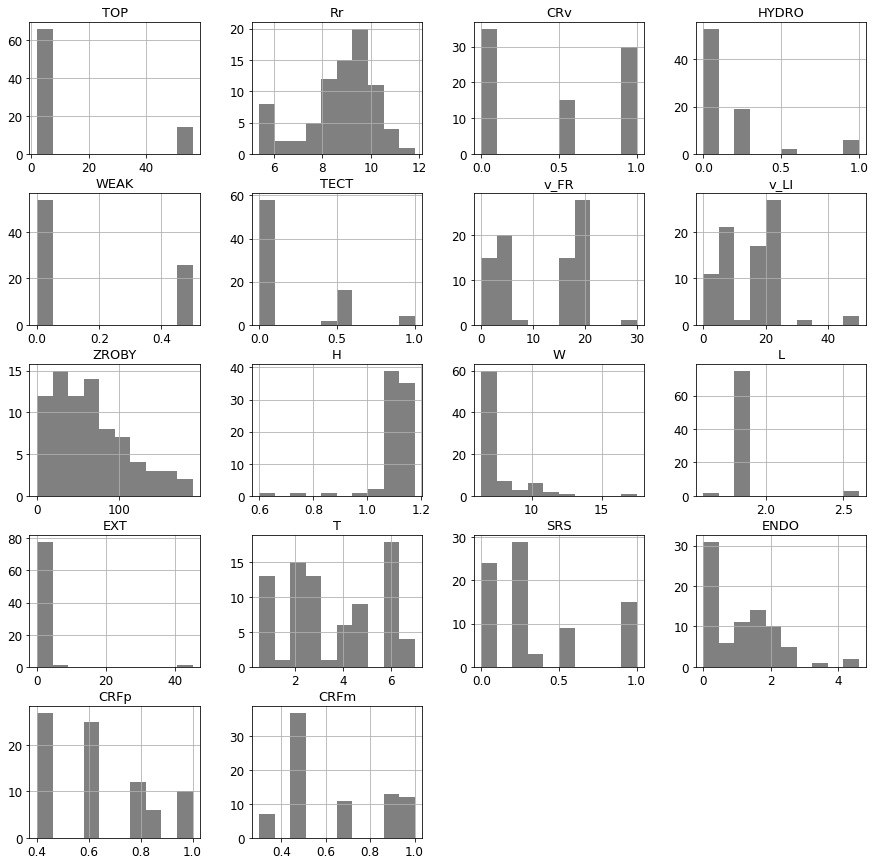

In [7]:
plt.rc('font', size=13)
plt.rc('axes', labelsize=14, titlesize=13)
plt.rc('legend', fontsize=13)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
data.hist(figsize=(15,15), color = 'grey')

In [8]:
data_I = data.loc[:,'TOP':'v_LI'].copy()

In [9]:
data_II = data.loc[:,'ZROBY':'ENDO'].copy()

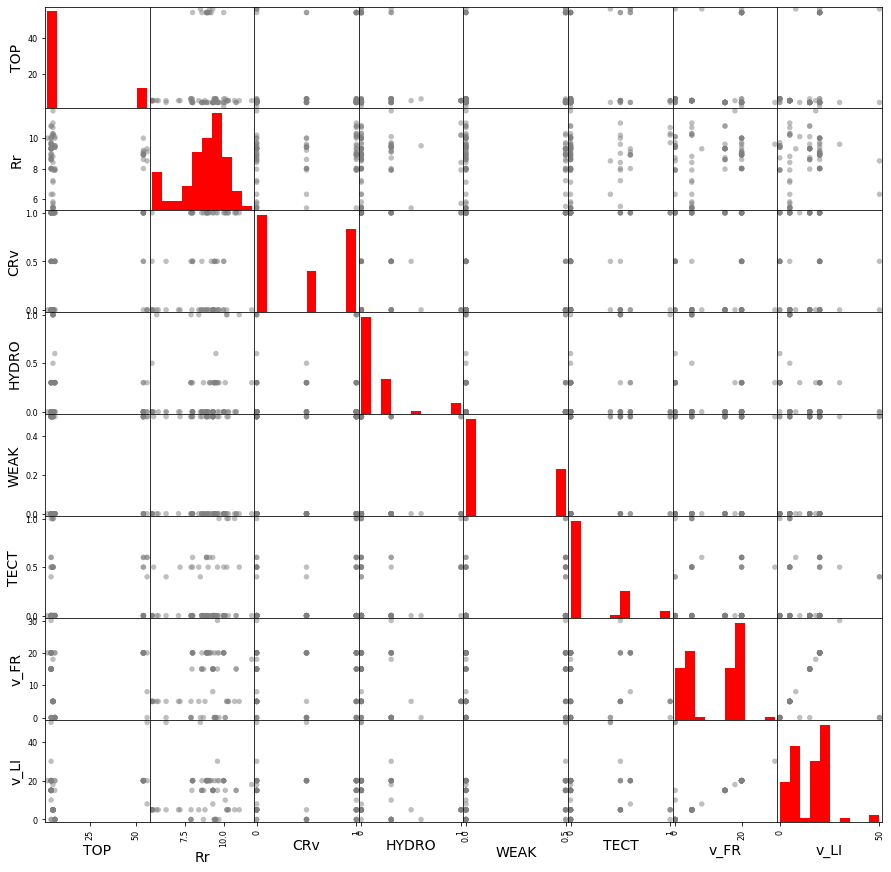

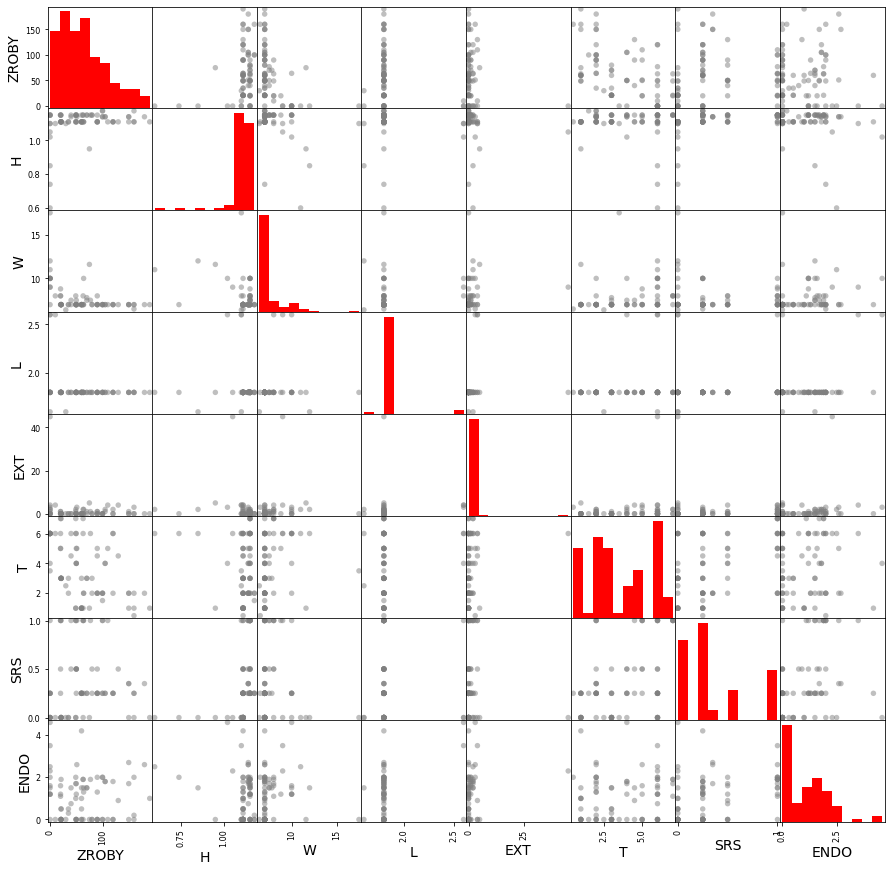

In [10]:
for plot in (data_I, data_II):
    pd.plotting.scatter_matrix(
        plot,
        figsize = (15,15),
        s = 120,
        color = 'grey',
        hist_kwds={'color':'red'}
    )

In [11]:
data.corr()

,TOP,Rr,CRv,HYDRO,WEAK,TECT,v_FR,v_LI,ZROBY,H,W,L,EXT,T,SRS,ENDO,CRFp,CRFm
TOP,1.000000,0.065101,0.176822,-0.144882,0.306717,0.167803,0.321945,0.368972,-0.161702,0.101536,0.142527,-0.116407,0.268805,0.297507,0.274577,0.113966,0.303269,0.451044
Rr,0.065101,1.000000,0.229011,0.078842,-0.010106,0.150074,0.249651,0.121230,-0.116557,0.089743,0.197163,0.105932,-0.004082,0.058627,-0.083524,0.035178,0.206503,0.073634
CRv,0.176822,0.229011,1.000000,0.039717,0.018549,0.150310,-0.014329,-0.036519,-0.015636,0.157618,-0.016625,0.260434,-0.084480,0.000744,0.317735,0.416522,0.406493,0.376110
HYDRO,-0.144882,0.078842,0.039717,1.000000,-0.091502,0.210166,-0.318841,-0.345364,-0.012870,0.034584,0.085260,0.011438,-0.047900,0.116287,0.184215,0.200951,0.108669,0.061891
WEAK,0.306717,-0.010106,0.018549,-0.091502,1.000000,0.307661,0.132619,0.273742,-0.267838,-0.255525,0.060188,-0.179487,0.178048,0.204091,0.073697,-0.020368,0.171769,0.286446
TECT,0.167803,0.150074,0.150310,0.210166,0.307661,1.000000,-0.076142,0.020294,0.011378,-0.330339,0.071916,-0.153141,0.162436,0.091989,0.113229,0.082113,0.395309,0.331370
v_FR,0.321945,0.249651,-0.014329,-0.318841,0.132619,-0.076142,1.000000,0.613861,-0.238218,0.256487,0.145357,-0.323031,-0.227327,0.098473,0.010717,-0.316309,-0.224114,-0.158103
v_LI,0.368972,0.121230,-0.036519,-0.345364,0.273742,0.020294,0.613861,1.000000,-0.405445,-0.222715,0.319528,-0.132562,0.389389,0.278276,-0.113626,-0.089705,0.106874,0.118059
ZROBY,-0.161702,-0.116557,-0.015636,-0.012870,-0.267838,0.011378,-0.238218,-0.405445,1.000000,0.273628,-0.419005,-0.206132,-0.140517,-0.484424,0.052275,-0.058445,-0.201701,-0.269333
H,0.101536,0.089743,0.157618,0.034584,-0.255525,-0.330339,0.256487,-0.222715,0.273628,1.000000,-0.343338,-0.030031,-0.137058,-0.137347,0.327883,-0.173922,-0.448945,-0.349693


In [12]:
pd.DataFrame([
    data.corr()['CRFp'].sort_values(ascending=False),
    data.corr()['CRFm'],
    data.corr()['CRFp'].sort_values(ascending=False).argsort(),
    data.corr()['CRFm'].sort_values(ascending=False).argsort(),
    ]).round(2)

,CRFp,CRFm,ENDO,W,CRv,TECT,EXT,TOP,L,Rr,WEAK,T,HYDRO,v_LI,SRS,ZROBY,v_FR,H
CRFp,1.00,0.77,0.50,0.45,0.41,0.40,0.30,0.30,0.29,0.21,0.17,0.11,0.11,0.11,0.01,-0.20,-0.22,-0.45
CRFm,0.77,1.00,0.52,0.46,0.38,0.33,0.27,0.45,0.25,0.07,0.29,0.19,0.06,0.12,0.23,-0.27,-0.16,-0.35
CRFp,17.00,16.00,15.00,14.00,13.00,12.00,11.00,10.00,9.00,8.00,7.00,6.00,5.00,4.00,3.00,2.00,1.00,0.00
CRFm,16.00,17.00,15.00,14.00,12.00,11.00,9.00,13.00,8.00,4.00,10.00,6.00,3.00,5.00,7.00,1.00,2.00,0.00


In [13]:
data.corr()['CRFp'].sort_values(ascending=False).argsort().loc[
    ["TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H","SRS","ENDO"]
    ].sort_values(ascending=False) 

ENDO     15
CRv      13
TECT     12
TOP      10
Rr        8
WEAK      7
HYDRO     5
v_LI      4
SRS       3
ZROBY     2
v_FR      1
H         0
Name: CRFp, dtype: int64

In [14]:
{"TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H",'W',"L","EXT","T","SRS","ENDO"} - {"TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H","SRS","ENDO"}

{'EXT', 'L', 'T', 'W'}

In [15]:
data.corr()['CRFp'].sort_values(ascending=False).argsort().loc[
    ['EXT', 'L', 'T', 'W']
    ].sort_values(ascending=False) 

W      14
EXT    11
L       9
T       6
Name: CRFp, dtype: int64

There are relatively high features that were not included in the `CRFp` indicator at the expert assessment stage (marked as having no impact)

4. **Przygotować dane pod względem algorytmów maszynowego uczenia** 
* uporządkować cechy typy CATEGORY:
    - określić martwe parametry,
    - rodzaj skał (wg Rr i Rc, usunąć 1),
* dodać kodowanie gorącojedynkowe
* standaryzacja
* podzielić zbiory
------------------

* martwe parametry <br>
1: brak 1,3,7 <br>
4: za dużo o 0,5

In [16]:
# dodać kodowanie gorącojedynkowe
data.TOP.replace({56:5, 54:5}, inplace = True)         # zamiana 56 i 54 na 5 - redukuje macierz CatOneHot z 6 kolumn do 4 !
data.EXT.replace({45:4}, inplace = True)         # zamiana 56 i 54 na 5 - redukuje macierz CatOneHot z 6 kolumn do 4 !


In [17]:
CRFp = data[['CRFp']]
CRFm = data[['CRFm']]
data_p = data[["TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H","SRS","ENDO"]]
#data_m = data[["TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H",'W',"L","EXT","T","SRS","ENDO"]]

## One hot encoding

In [324]:
cat_encoder = OneHotEncoder()
data_hot1enc = cat_encoder.fit_transform(data[["TOP"]])
data_hot1enc.toarray()

array([[0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0.

In [343]:
cat_encoder.get_feature_names_out()

array(['TOP_2', 'TOP_4', 'TOP_5', 'TOP_6', 'TOP_54', 'TOP_56'],
      dtype=object)

In [344]:
pd.DataFrame(data_hot1enc.toarray(),
    columns=cat_encoder.get_feature_names_out()
)

,TOP_2,TOP_4,TOP_5,TOP_6,TOP_54,TOP_56
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
75,0.0,1.0,0.0,0.0,0.0,0.0
76,0.0,1.0,0.0,0.0,0.0,0.0
77,0.0,1.0,0.0,0.0,0.0,0.0
78,0.0,1.0,0.0,0.0,0.0,0.0


## Train test split

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    data_p, CRFp, test_size=0.10, random_state=42)

[x.shape for x in [X_train, X_test, y_train, y_test]]

#X_train.shape[1:]

[(72, 12), (8, 12), (72, 1), (8, 1)]

## Stratified Shuffle

In [277]:
from sklearn.model_selection import StratifiedShuffleSplit

In [260]:
set_strat_ = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=42)

In [275]:
for X, y in set_strat_.split(data_p, CRFp) :
    print(X,'\t', y, '\n')


[20 10 71 63 40 25 35 55 24 48 11 15 44 67 53 58 59 23 26  0 13  4 18  9
  8 52 41 57 21 38 28 12 64 75 49 74 70 65 54 32 72 43 22  6 37  5 17 19
 77 60 42  2 14 30 50 76 68 29 46 16 51 27 69  7] 	 [61 78 73 33 34 79 62  3 66 47 39 45 56 31 36  1] 

[30 19 66 68 20 59 41 58  4 13 64 10 17 15 47  6 74  9 25 42 65 79 11 14
  5 60  2 38 78 62 16 73 36  3 45 52 43 24 48 35  1 69 26 57 40 27 55 75
 29 71 46 18 28 33  8 34 50 63 53 70 54 72 44 12] 	 [ 0 77 31 67 51 61 56 22 37 76 21 49 32 23  7 39] 

[ 2 26 67 17  8 13 56 11 30 44  4 10 55 43 38 35 20 31 68 51 63 40 37 61
 46 36 57 23 12 14 45  7 33 53 79 70 69  5 72 16  9 32 29 27 65 74 78  1
 21 47 64 22 76 54 24 15 50 59 66 34 62 41 18  3] 	 [60 19 42 49 48 25  0 28 52  6 39 77 71 73 75 58] 



In [272]:
list_strat_ = []

In [273]:
for train, test in set_strat_.split(data_p, CRFp):
    strat_train = data.iloc[train]
    strat_test = data.iloc[test]
    list_strat_.append([strat_train, strat_test])

In [296]:
list_strat_[0][1][["TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H","SRS","ENDO"]]

,TOP,Rr,CRv,HYDRO,WEAK,TECT,v_FR,v_LI,ZROBY,H,SRS,ENDO
61,5,11.00,1.0,1.0,0.0,0.5,5,5,120,1.11,0.25,1.8
78,4,10.80,1.0,0.0,0.0,0.0,15,15,21,1.11,0.00,0.5
73,4,9.31,1.0,0.0,0.5,0.0,15,15,21,1.11,0.00,0.5
33,4,10.00,0.5,0.0,0.0,0.0,20,20,40,1.15,1.00,1.5
34,4,10.00,0.5,0.0,0.0,0.0,20,20,20,1.15,0.50,1.6
79,4,10.80,1.0,0.0,0.0,0.0,15,15,21,1.11,0.00,0.0
62,5,7.90,1.0,1.0,0.5,0.5,5,5,64,1.11,1.00,1.5
3,4,8.70,1.0,0.3,0.0,0.0,0,0,0,1.02,0.00,4.6
66,5,10.70,1.0,0.0,0.0,1.0,5,5,160,1.11,0.25,2.0
47,54,8.60,0.5,0.0,0.5,0.0,20,20,49,1.15,1.00,2.0


In [299]:
X_train_st, X_test_st = list_strat_[0][0][["TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H","SRS","ENDO"]] , list_strat_[0][1][["TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H","SRS","ENDO"]]

In [300]:
Y_train_st, Y_test_st = list_strat_[0][0][['CRFp']] , list_strat_[0][1][['CRFp']]

set #_1 - X_train, X_test, y_train, y_test `from sklearn.model_selection import train_test_split`

set #_2 - X_train_st, X_test_st, Y_train_st, Y_test_st `from sklearn.model_selection import StratifiedShuffleSplit` (now use one of five split set)

## StandardScaler

In [426]:
from sklearn.preprocessing import StandardScaler

In [427]:
scaler = StandardScaler()

In [428]:
scaler.fit(data_p)

StandardScaler()

In [429]:
X_train_SS = scaler.transform(X_train)
X_test_SS = scaler.transform(X_test)

In [430]:
X_train_SS

array([[-4.94543090e-01,  6.68472755e-01, -1.04257207e+00,
        -5.71428571e-01,  1.44115338e+00,  2.86909095e+00,
        -1.40647737e+00, -1.34044852e+00, -1.30812470e+00,
        -4.40769288e+00, -9.94405766e-01,  9.05922566e-01],
       [-3.88899706e-01, -5.78742543e-01,  6.95048047e-02,
         5.00000000e-01,  1.44115338e+00, -5.77264545e-01,
        -1.40647737e+00, -1.34044852e+00, -4.74924253e-01,
         3.74343810e-01,  4.36393897e-01, -2.88438101e-01],
       [ 2.14654150e+00, -5.09452804e-01,  1.18158168e+00,
        -5.71428571e-01,  1.44115338e+00, -5.77264545e-01,
         1.03691437e+00,  7.09950744e-01, -1.30812470e+00,
         4.93894727e-01, -2.79005934e-01,  1.41531739e-01],
       [-4.94543090e-01,  8.76341971e-01,  6.95048047e-02,
        -5.71428571e-01, -6.93888666e-01, -5.77264545e-01,
         1.03691437e+00,  7.09950744e-01, -4.74924253e-01,
         4.93894727e-01,  1.86719356e+00,  4.28178299e-01],
       [-4.41721398e-01, -1.06377071e+00, -1.0425720

## MinMacScaler 
`Appropriate due to the range -1:1 of the activation functions`

In [50]:
from sklearn.preprocessing import MinMaxScaler

scalerMinMax = MinMaxScaler(feature_range=(-1, 1))
scalerMinMax.fit(data_p)

scalerMinMax_output = MinMaxScaler(feature_range=(-1, 1))
scalerMinMax_output.fit(CRFp)

X_train = scalerMinMax.transform(X_train)
X_test = scalerMinMax.transform(X_test)

C:\Users\Inspektor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Inspektor\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


### SUMMARY

NameError: name 'X_train_SS' is not defined

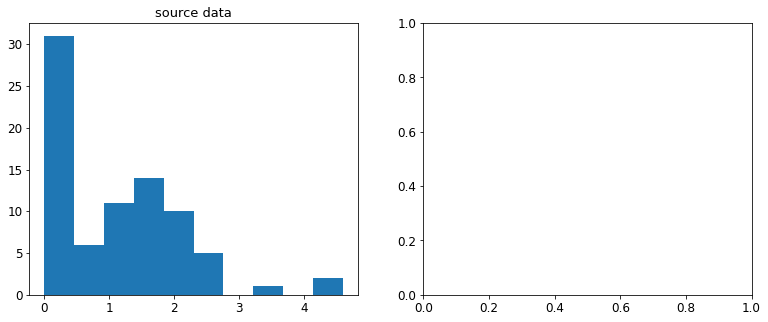

In [21]:
plt.figure(figsize= (20,5))
plt.subplot(1, 3, 1)
plt.hist(data[['ENDO']])
plt.gca().title.set_text("source data")
plt.subplot(1, 3, 2)
plt.hist(pd.DataFrame(X_train_SS, columns = scaler.feature_names_in_)[['ENDO']])
plt.gca().title.set_text(scaler)
plt.subplot(1, 3, 3)
plt.hist(pd.DataFrame(X_train, columns = scalerMinMax.feature_names_in_)[['ENDO']])
plt.gca().title.set_text(scalerMinMax)


# 5. Wybrać i wyuczyć model 
------------------------------------

In [154]:
#need: import tensorflow as tf
#need: from tensorflow import keras

In [22]:
tf.__version__

'2.8.0'

In [23]:
list_output = hold_data() # saved model output to common list

In [24]:
model = keras.models.Sequential()
#model.add(keras.Input(shape=(12,)))
model.add(keras.layers.Dense(7, activation = 'relu', input_shape = (12,), kernel_initializer = 'he_normal'))
model.add(keras.layers.Dense(4, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 91        
                                                                 
 dense_1 (Dense)             (None, 4)                 32        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [25]:
#model.layers

In [26]:
#weights, biases = model.layers[1].get_weights()
#weights, biases

In [27]:
"""import tensorflow_probability as tfp

def pearson_(x,y):
    return tfp.stats.correlation(x,y)"""

'import tensorflow_probability as tfp\n\ndef pearson_(x,y):\n    return tfp.stats.correlation(x,y)'

In [28]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'SGD',
             metrics = ["MAE"])

In [29]:
X_train.shape

(72, 12)

In [30]:
history = model.fit(X_train, y_train, epochs = 100,
                    validation_split = 0.2, shuffle = True) #steps_per_epoch=32 

Epoch 1/100
2/2 [==============================] - 1s 145ms/step - loss: 1.1572 - MAE: 0.8541 - val_loss: 0.9242 - val_MAE: 0.8880
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 0.5501 - MAE: 0.6069 - val_loss: 0.5600 - val_MAE: 0.7091
Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 0.3638 - MAE: 0.5090 - val_loss: 0.4009 - val_MAE: 0.6058
Epoch 4/100
2/2 [==============================] - 0s 24ms/step - loss: 0.2852 - MAE: 0.4543 - val_loss: 0.3179 - val_MAE: 0.5381
Epoch 5/100
2/2 [==============================] - 0s 23ms/step - loss: 0.2469 - MAE: 0.4241 - val_loss: 0.2712 - val_MAE: 0.4923
Epoch 6/100
2/2 [==============================] - 0s 26ms/step - loss: 0.2254 - MAE: 0.4069 - val_loss: 0.2412 - val_MAE: 0.4588
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 0.2122 - MAE: 0.3940 - val_loss: 0.2216 - val_MAE: 0.4347
Epoch 8/100
2/2 [==============================] - 0s 29ms/step - loss: 0.2024 - MAE: 0.3

In [31]:
list_output.add_out(*['model', 0.15 , "random ini",' - - ',"loss: 0.0401 - MAE: 0.1586 - val_loss: 0.0564 - val_MAE: 0.1963",'Podstawowy'])
" 'NET','MAX_MSE','TUNER_KERAS','OTHER', 'EXTRAS#1','EXTRAS#2' "

Added:  ['model', 0.15, 'random ini', ' - - ', 'loss: 0.0401 - MAE: 0.1586 - val_loss: 0.0564 - val_MAE: 0.1963', 'Podstawowy']


" 'NET','MAX_MSE','TUNER_KERAS','OTHER', 'EXTRAS#1','EXTRAS#2' "

In [32]:
list_output.print_()

     NET  MAX_MSE TUNER_KERAS  OTHER  \
0  model     0.15  random ini   - -    

                                            EXTRAS#1    EXTRAS#2  
0  loss: 0.0401 - MAE: 0.1586 - val_loss: 0.0564 ...  Podstawowy  


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 91        
                                                                 
 dense_1 (Dense)             (None, 4)                 32        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


[0.8090669987308191, 0.4236944196157194, 0.5756851700298534] średnia:  0.603 max:  0.424 struktura:  [6, 6, 1]
[0.6046369735505306, 0.6664051248096508, 0.7279098133942129] średnia:  0.666 max:  0.605 struktura:  [7, 7, 1]
[0.7773319035988926, 0.7014568116472633, 0.6841310803650487] średnia:  0.721 max:  0.684 struktura:  [8, 8, 1]
[0.7538446376713375, 0.8015658729067675, 0.8256802623096473] średnia:  0.794 max:  0.754 struktura:  [9, 9, 1]


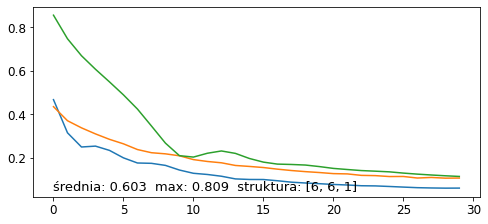

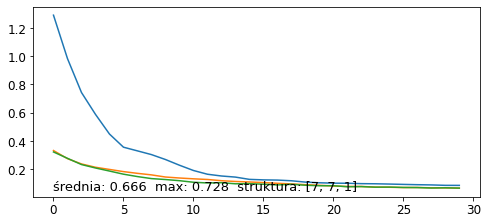

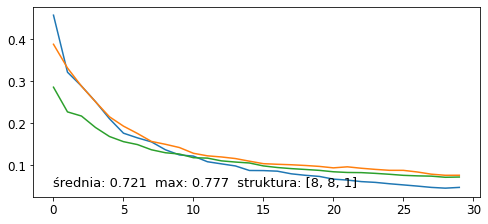

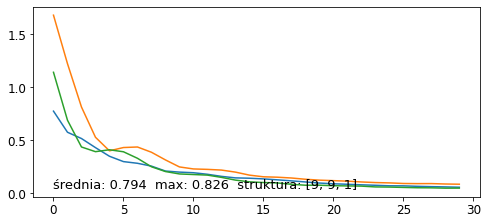

In [34]:
# #_2 check influence of the number of neurons, given optimizer and model.compile  -> plot_train_via_neurons(foo), compute()
def foo(NEURONS):
    model = keras.models.Sequential()
    #model.add(keras.Input(shape=(12,)))
    model.add(keras.layers.Dense(NEURONS, activation = 'relu', input_shape = (12,), kernel_initializer = 'he_normal'))
    model.add(keras.layers.Dense(NEURONS, activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate = 0.01, beta_1=0.9, beta_2 = 0.999)
    model.compile(loss = "MAE",
                 optimizer = optimizer,
                 metrics = ["MAE"])
    return model

test_ = plot_train_via_neurons(foo, scalerMinMax, (data_p, CRFp))
test_.compute(X_train, y_train, epochs = 30, validation_split = 0.2, shuffle = True, verbose=0)

In [35]:
list_output.add_out(*['model_n_neurons', 0.75 , "random ini",'plot_train_via_neurons',"średnia:  0.719 max:  0.787",'struktura:  [8, 8, 1]'])

Added:  ['model_n_neurons', 0.75, 'random ini', 'plot_train_via_neurons', 'średnia:  0.719 max:  0.787', 'struktura:  [8, 8, 1]']


In [36]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) /2 
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [37]:
def foo_hb(NEURONS):
    model = keras.models.Sequential()
    #model.add(keras.Input(shape=(12,)))
    model.add(keras.layers.Dense(NEURONS, activation = 'relu', input_shape = (12,), kernel_initializer = 'he_normal'))
    model.add(keras.layers.Dense(NEURONS, activation = 'relu', kernel_initializer = 'he_normal'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate = 0.01, beta_1=0.9, beta_2 = 0.999)
    model.compile(loss = huber_fn,
                 optimizer = optimizer,
                 metrics = ["MAE"])
    return model

[0.7434296954691513, 0.733284264099716, 0.6242710845792665] średnia:  0.7 max:  0.624 struktura:  [6, 6, 1]
[0.4860784871522641, 0.611149248999713, 0.6687826865046681] średnia:  0.589 max:  0.486 struktura:  [7, 7, 1]
[0.8041959520413509, 0.6798335122336785, 0.6778042460399288] średnia:  0.721 max:  0.678 struktura:  [8, 8, 1]
[0.5284092766504456, 0.6313263066335749, 0.5411553890423466] średnia:  0.567 max:  0.528 struktura:  [9, 9, 1]


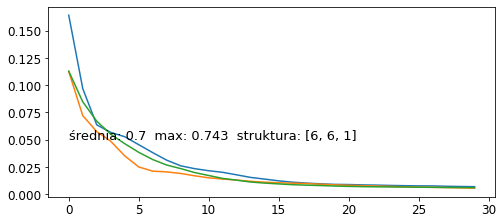

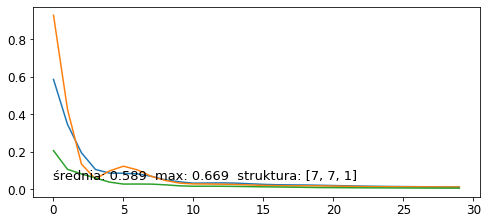

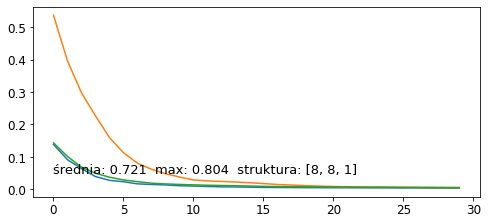

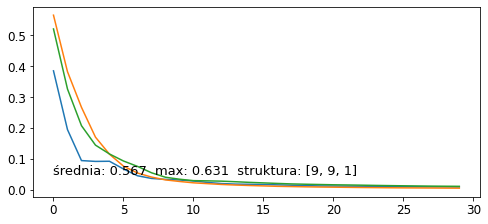

In [38]:
test_hb_ = plot_train_via_neurons(foo_hb, scalerMinMax, (data_p, CRFp))
test_hb_.compute(X_train, y_train, epochs = 30, validation_split = 0.2, shuffle = True, verbose=0)

In [39]:
list_output.add_out(*['model_n_neurons', 0.84 , "random ini + hb fn",'plot_train_via_neurons',"średnia:  0.743 max:  0.8427",'struktura:  [9, 9, 1]'])

Added:  ['model_n_neurons', 0.84, 'random ini + hb fn', 'plot_train_via_neurons', 'średnia:  0.743 max:  0.8427', 'struktura:  [9, 9, 1]']


Using the Huber activation function increased the value of the metric from `0.15 to 0.84 (MAE)`

[0.2437191380813412, 0.6456793598805648, 0.49536403446114946] średnia:  0.462 max:  0.646 struktura:  [6, 6, 1]
[0.6191763478964285, 0.5623083379068612, 0.6578671190105725] średnia:  0.613 max:  0.658 struktura:  [7, 7, 1]
[0.7170106351523928, 0.6522977963786661, 0.6984580186508186] średnia:  0.689 max:  0.717 struktura:  [8, 8, 1]
[0.40761931122101075, 0.5648932449726425, 0.7024944230677039] średnia:  0.558 max:  0.702 struktura:  [9, 9, 1]


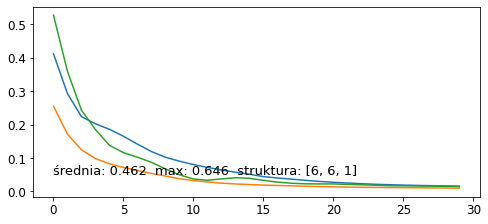

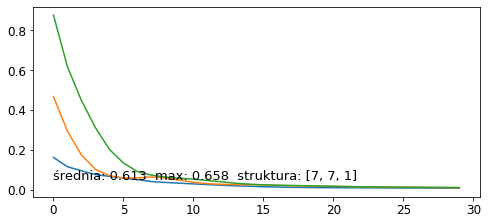

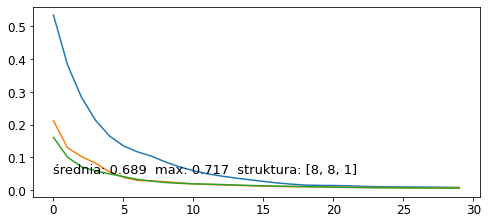

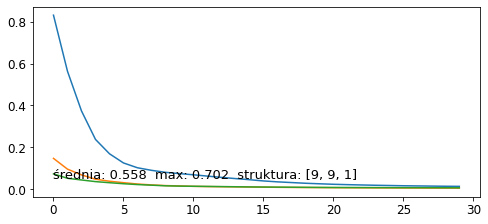

In [43]:
# let's try output distribution
test_hb_ = plot_box_via_neurons(foo_hb, scalerMinMax, (data_p, CRFp))
test_hb_.compute(X_train, y_train, epochs = 30, validation_split = 0.2, shuffle = True, verbose=0)

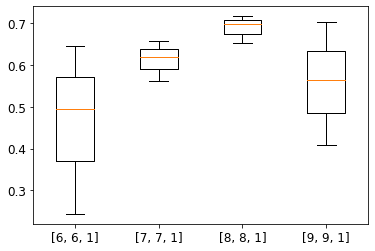

In [44]:
test_hb_.plot_box()

In [45]:
list_output.print_()

               NET  MAX_MSE         TUNER_KERAS                   OTHER  \
0            model     0.15          random ini                    - -    
1  model_n_neurons     0.75          random ini  plot_train_via_neurons   
2  model_n_neurons     0.84  random ini + hb fn  plot_train_via_neurons   

                                            EXTRAS#1               EXTRAS#2  
0  loss: 0.0401 - MAE: 0.1586 - val_loss: 0.0564 ...             Podstawowy  
1                        średnia:  0.719 max:  0.787  struktura:  [8, 8, 1]  
2                       średnia:  0.743 max:  0.8427  struktura:  [9, 9, 1]  


Three times repeated prediction made for four structures. Best result for 9 neurons (also upper limit of the test). This proves the necessity to re-test for a larger scope (10, 11 and 12 neuronos). Experience shows that it may have too many degrees of freedom.
Additionally, an increase in the number of neurons reduces the variance (*vide* - box plot). Which increases the repeatability of a better result. Learning curves don't look bad. 

The mean and the maximum value of MAE are similar for the `MAE` and `Huber_fn` functions, but in the second case, the learning curves are smoother

# BRAK DANYCH WALIDACYJNYCH !!!!

6. Dostroić model
------------------

In [ ]:
# CLASSIC STYLE (Seq)
model = keras.models.Sequential()
model.add(keras.layers.Dense(7, activation = 'relu', input_shape = (12,), kernel_initializer = 'he_normal'))
model.add(keras.layers.Dense(4, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(keras.layers.Dense(1))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 91        
                                                                 
 dense_1 (Dense)             (None, 4)                 32        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'mean_squared_error',
             optimizer = 'SGD',
             metrics = ["MAE"])

In [ ]:
history = model.fit(X_train, y_train, epochs = 100,
                    validation_split = 0.2, shuffle = True)

## keras_tuner

In [ ]:
import keras_tuner as kt

In [ ]:
# need: import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=4, default=2)
    n_neurons = hp.Int("n_neurons", min_value=3, max_value=11)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    
    optimizer = {
        'sgd': tf.keras.optimizers.SGD(learning_rate=learning_rate),
        'adam': tf.keras.optimizers.Adam(learning_rate=learning_rate)
    }.get(optimizer)
    

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(1, activation="relu"))
    model.compile(loss=huber_fn, optimizer=optimizer,
                  metrics=["MAE"])
    return model

In [ ]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="MAE", max_trials=10, overwrite=True,
    directory="proba_Kerac", project_name="my_SSN_keras", seed=42)

In [ ]:
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_test, y_test))

Trial 10 Complete [00h 00m 01s]
MAE: 0.6503471732139587

Best MAE So Far: 0.3700334429740906
Total elapsed time: 00h 00m 12s
INFO:tensorflow:Oracle triggered exit


In [ ]:
top3_models = random_search_tuner.get_best_models(num_models = 3)

In [ ]:
best_model = top3_models[0]

In [ ]:
random_search_tuner.get_best_hyperparameters(num_trials = 3)
random_search_tuner.get_best_hyperparameters(num_trials = 3)[0].values

{'n_hidden': 2,
 'n_neurons': 5,
 'learning_rate': 0.00905127409782462,
 'optimizer': 'sgd'}

7. Zaprezentować rozwiązanie **(...)** 
------------------

------------------
7. Zaprezentować rozwiązanie (vide - ocena modelu)
8. Przygotowć potok. Podzielić na katologi produkcyjne. Pokryć sieć testami jednostkowymi. 
------------------


In [57]:
def MinMaxScaler_(MINMAXSCALER):
    return MINMAXSCALER
    
scaler_to_net_ = MinMaxScaler_(scalerMinMax)
scaler_to_net_out_ = MinMaxScaler_(scalerMinMax_output)

In [112]:
class in_scaler_tf(tf.keras.layers.Layer):
    def __init__(self, scaler = scalerMinMax):
        self.scaler = scaler
        super(in_scaler_tf,self).__init__()
        
    def call(self, INPUT):
        INPUT *= tf.convert_to_tensor(self.scaler.scale_.tolist(), tf.float32)
        INPUT += tf.convert_to_tensor(self.scaler.min_.tolist(), tf.float32)
        INPUT = tf.experimental.numpy.clip(INPUT, self.scaler.feature_range[0], self.scaler.feature_range[1])
        return INPUT

In [113]:
class out_scaler_tf(tf.keras.layers.Layer):
    def __init__(self, scaler = scalerMinMax_output):
        self.scaler = scaler
        super(out_scaler_tf,self).__init__()
        
    def call(self, INPUT):
        INPUT -= self.scaler.min_
        INPUT /= self.scaler.scale_
        return INPUT

In [115]:
model = keras.models.Sequential()
model.add(in_scaler_tf())
model.add(keras.layers.Dense(7, activation = 'relu', input_shape = (12,), kernel_initializer = 'he_normal'))
model.add(keras.layers.Dense(4, activation = 'relu', kernel_initializer = 'he_normal'))
model.add(keras.layers.Dense(1))
model.add(out_scaler_tf())
model.compile(loss = 'mean_squared_error',
             optimizer = 'SGD',
             metrics = ["MAE"])
history = model.fit(X_train, y_train, epochs = 100,
                    validation_split = 0.2, shuffle = True)

Epoch 1/100
2/2 [==============================] - 1s 178ms/step - loss: 0.1188 - MAE: 0.2937 - val_loss: 0.0971 - val_MAE: 0.2440
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1110 - MAE: 0.2800 - val_loss: 0.0910 - val_MAE: 0.2310
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 0.1042 - MAE: 0.2681 - val_loss: 0.0856 - val_MAE: 0.2190
Epoch 4/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0981 - MAE: 0.2574 - val_loss: 0.0808 - val_MAE: 0.2074
Epoch 5/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0926 - MAE: 0.2465 - val_loss: 0.0766 - val_MAE: 0.1972
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0878 - MAE: 0.2373 - val_loss: 0.0728 - val_MAE: 0.1886
Epoch 7/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0835 - MAE: 0.2283 - val_loss: 0.0696 - val_MAE: 0.1807
Epoch 8/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0797 - MAE: 0.2

In [ ]:
# required import scaler MinMax in_ = joblib.load('scalerMinMax.pkl')
in_ = joblib.load('scalerMinMax.pkl')
in_.transform([[
    5.0, 11.8, 0.0, 0.3, 0.0, 0.0, 18.0, 18.0, 0.0, 1.1, 0.0, 0.0
]])[0]

array([-0.88888889,  1.        , -1.        , -0.4       , -1.        ,
       -1.        ,  0.2       , -0.28      , -1.        ,  0.73913043,
       -1.        , -1.        ])

In [ ]:
assert np.allclose(
    in_scaler_tf(tf.Variable([
    5.0, 11.8, 0.0, 0.3, 0.0, 0.0, 18.0, 18.0, 0.0, 1.1, 0.0, 0.0
])).numpy()
    ,in_.transform([[
    5.0, 11.8, 0.0, 0.3, 0.0, 0.0, 18.0, 18.0, 0.0, 1.1, 0.0, 0.0
]])[0]
)

TypeError: __init__() takes 1 positional argument but 2 were given

9. **Uruchomić**, monitorować i utrzymać system./
------------------

In [ ]:
"""
import joblib

new_model = tf.keras.models.load_model('ANNmodel')
out_ = joblib.load('scaler2.pkl')
in_ = joblib.load('scalerMinMax.pkl')

data = pd.read_excel("SNN.xls",header = None, sheet_name= 1)
"""

'\nimport joblib\n\nnew_model = tf.keras.models.load_model(\'ANNmodel\')\nout_ = joblib.load(\'scaler2.pkl\')\nin_ = joblib.load(\'scalerMinMax.pkl\')\n\ndate = pd.read_excel("SNN.xls",header = None, sheet_name= 1)\n'

In [ ]:
# DOCKER 
# docker run -it --rm -v "C:\\Users\\Inspektor\\ANNmodel:/models/siecNN/1" -p 8500:8500 -p 8501:8501 -e MODEL_NAME=siecNN tensorflow/serving

In [ ]:
#SSN_CRFp(data_p[:10], in_, out_,new_model)  # 10 dodatkowych danych testowych
#in_.transform(data_p[:10])

# new_model.predict( ... )
# out_.inverse_transform( ...)

In [ ]:
# np.array(
#    in_.transform(data_p[:10])
#)
a = np.array([[-0.88888889,  1.        , -1.        , -0.4       , -1.        ,
        -1.        ,  0.2       , -0.28      , -1.        ,  0.73913043,
        -1.        , -1.        ],
       [-0.92592593,  0.3125    , -1.        , -0.4       ,  1.        ,
         0.        ,  1.        ,  0.2       , -1.        , -0.13043478,
        -1.        , -0.34782609],
       [-0.88888889,  0.21875   , -1.        , -1.        , -1.        ,
         0.2       , -0.46666667, -0.68      , -0.21052632,  0.2173913 ,
        -1.        , -1.        ],
       [-0.92592593,  0.03125   ,  1.        , -0.4       , -1.        ,
        -1.        , -1.        , -1.        , -1.        ,  0.46086957,
        -1.        ,  1.        ],
       [-0.92592593,  0.34375   , -1.        , -1.        ,  1.        ,
         1.        , -1.        , -1.        , -1.        , -0.51304348,
        -1.        , -0.13043478],
       [-0.88888889, -0.03125   , -1.        , -1.        ,  1.        ,
        -0.2       , -1.        ,  1.        , -1.        ,  0.56521739,
        -1.        ,  0.        ],
       [-0.85185185,  0.46875   ,  1.        , -1.        , -1.        ,
        -1.        , -1.        , -0.4       , -0.89473684,  0.73913043,
        -1.        , -1.        ],
       [-0.92592593,  0.46875   ,  1.        , -0.4       , -1.        ,
        -1.        , -1.        , -0.6       , -1.        ,  0.73913043,
         1.        ,  0.52173913],
       [-0.92592593, -0.71875   ,  0.        , -1.        ,  1.        ,
        -0.2       , -1.        ,  1.        , -1.        , -1.        ,
        -1.        ,  0.08695652],
       [-0.88888889,  0.15625   , -1.        , -0.4       ,  1.        ,
         0.2       ,  0.33333333, -0.2       , -0.68421053,  0.73913043,
        -1.        , -1.        ]])

In [ ]:
import json


request_json = json.dumps({
    "signature_name": "serving_default",
    "instances": a.tolist(),
})

In [ ]:
#siec NN
import requests

server_url = "http://localhost:8501/v1/models/siecNN:predict"
response = requests.post(server_url, data=request_json)
response.raise_for_status()  # raise an exception in case of error
response = response.json()

In [ ]:
# output scaler
out_.inverse_transform(
    response['predictions']
)

# assert _==_ 

## BRUDNOPIS

In [ ]:
np.save("ha.npy", X_train.to_numpy()[0:3].reshape(-1,12,1))

In [ ]:
# bez normalizacji
!saved_model_cli run --dir ANNmodel --tag_set serve --signature_def serving_default --inputs {'flatten_input'}=ha.npy

Result for output key dense_1:
[[0.76234436]
 [0.78554124]
 [0.78554124]]


2022-06-10 22:10:39.358681: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-06-10 22:10:39.358735: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-10 22:10:52.723844: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-06-10 22:10:52.723898: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-10 22:10:52.732035: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: DESKTOP-RR620JF
2022-06-10 22:10:52.732241: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: DESKTOP-RR620JF
2022-06-10 22:10:52.733264: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is

# ZAMIENIĆ NAZWY KOLUMN

In [ ]:
#odczytanie excela oraz konwersja z ',' na '.'
br_dane = pd.read_excel('SSN\ANN.xlsx', sheet_name = 'tabela', engine = 'openpyxl', thousands=".")

In [ ]:
br_dane.columns

Index(['Rodzaj skał stropowych', 'Wytrzymałość na rozciąganie',
       'Spękania pionowe', 'Zawodnienie', 'Płaszczyzny osłabienia',
       'Występowanie zaburzeń zalegania złoża ',
       'Średni postęp miesięczny frontu', 'Średni postęp mieś. likwidacji',
       'Występowanie zaszłości (stare wyrobiska, zroby)',
       'Głębokość zalegania złoża', 'Rzeczywista szerokość', 'Długość kotwi',
       'Dodatkowa obudowa', 'Czas istnienia wyrobiska',
       'Opadnięcia elementów SRS',
       'Rozwarstwienia stwierdzone badaniem endoskopowym', 'Predyspozycja',
       'Możliwość utrzymania'],
      dtype='object')

In [ ]:
{a:a.upper() for a in br_dane.columns}

{'Rodzaj skał stropowych': 'RODZAJ SKAŁ STROPOWYCH',
 'Wytrzymałość na rozciąganie': 'WYTRZYMAŁOŚĆ NA ROZCIĄGANIE',
 'Spękania pionowe': 'SPĘKANIA PIONOWE',
 'Zawodnienie': 'ZAWODNIENIE',
 'Płaszczyzny osłabienia': 'PŁASZCZYZNY OSŁABIENIA',
 'Występowanie zaburzeń zalegania złoża ': 'WYSTĘPOWANIE ZABURZEŃ ZALEGANIA ZŁOŻA ',
 'Średni postęp miesięczny frontu': 'ŚREDNI POSTĘP MIESIĘCZNY FRONTU',
 'Średni postęp mieś. likwidacji': 'ŚREDNI POSTĘP MIEŚ. LIKWIDACJI',
 'Występowanie zaszłości (stare wyrobiska, zroby)': 'WYSTĘPOWANIE ZASZŁOŚCI (STARE WYROBISKA, ZROBY)',
 'Głębokość zalegania złoża': 'GŁĘBOKOŚĆ ZALEGANIA ZŁOŻA',
 'Rzeczywista szerokość': 'RZECZYWISTA SZEROKOŚĆ',
 'Długość kotwi': 'DŁUGOŚĆ KOTWI',
 'Dodatkowa obudowa': 'DODATKOWA OBUDOWA',
 'Czas istnienia wyrobiska': 'CZAS ISTNIENIA WYROBISKA',
 'Opadnięcia elementów SRS': 'OPADNIĘCIA ELEMENTÓW SRS',
 'Rozwarstwienia stwierdzone badaniem endoskopowym': 'ROZWARSTWIENIA STWIERDZONE BADANIEM ENDOSKOPOWYM',
 'Predyspozycja': 'PREDY

In [ ]:
new_name = {'Rodzaj skał stropowych': 'TOP',
 'Wytrzymałość na rozciąganie': 'Rr',
 'Spękania pionowe': 'CRv',
 'Zawodnienie': 'HYDRO',
 'Płaszczyzny osłabienia': 'WEAK',
 'Występowanie zaburzeń zalegania złoża ': 'TECT',
 'Średni postęp miesięczny frontu': 'v_FR',
 'Średni postęp mieś. likwidacji': 'v_LI',
 'Występowanie zaszłości (stare wyrobiska, zroby)': 'ZROBY',
 'Głębokość zalegania złoża': 'H',
 'Rzeczywista szerokość': 'W',
 'Długość kotwi': 'L',
 'Dodatkowa obudowa': 'EXT',
 'Czas istnienia wyrobiska': 'T',
 'Opadnięcia elementów SRS': 'SRS',
 'Rozwarstwienia stwierdzone badaniem endoskopowym': 'ENDO',
 'Predyspozycja': 'CRFp',
 'Możliwość utrzymania': 'CRFm'}
new_name.values()

dict_values(['TOP', 'Rr', 'CRv', 'HYDRO', 'WEAK', 'TECT', 'v_FR', 'v_LI', 'ZROBY', 'H', 'W', 'L', 'EXT', 'T', 'SRS', 'ENDO', 'CRFp', 'CRFm'])

In [ ]:
# nowe nazwy
br_dane.columns = new_name.values()

In [ ]:
br_dane.head()

,TOP,Rr,CRv,HYDRO,WEAK,TECT,v_FR,v_LI,ZROBY,H,W,L,EXT,T,SRS,ENDO,CRFp,CRFm
0,5,11.8,0.0,0.3,0.0,0.0,18,18,0,1.10,17.5,1.8,0,3.5,0.0,0.0,1.0,1.0
1,4,9.6,0.0,0.3,0.5,0.5,30,30,0,0.85,12.0,1.6,2,6.0,0.0,1.5,1.0,1.0
2,56,9.3,0.0,0.0,0.0,0.6,8,8,75,0.95,11.6,1.8,5,1.0,0.0,0.0,1.0,1.0
3,4,8.7,1.0,0.3,0.0,0.0,0,0,0,1.02,10.0,2.6,3,4.0,0.0,4.6,1.0,1.0
4,4,9.7,0.0,0.0,0.5,1.0,0,0,0,0.74,7.0,1.8,0,6.0,0.0,2.0,1.0,1.0


In [ ]:
br_dane.to_csv('SSN\out1.csv', index = False)

In [ ]:
br_dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TOP     80 non-null     int64  
 1   Rr      80 non-null     float64
 2   CRv     80 non-null     float64
 3   HYDRO   80 non-null     float64
 4   WEAK    80 non-null     float64
 5   TECT    80 non-null     float64
 6   v_FR    80 non-null     int64  
 7   v_LI    80 non-null     int64  
 8   ZROBY   80 non-null     int64  
 9   H       80 non-null     float64
 10  W       80 non-null     float64
 11  L       80 non-null     float64
 12  EXT     80 non-null     int64  
 13  T       80 non-null     float64
 14  SRS     80 non-null     float64
 15  ENDO    80 non-null     float64
 16  CRFp    80 non-null     float64
 17  CRFm    80 non-null     float64
dtypes: float64(13), int64(5)
memory usage: 11.4 KB


GOTOWE - NAZWY KOLUMN ZAMIENIONE

# OKREŚLIĆ MARTWE WARTOŚCI (NIE UŻYTE)
1: 1,3,7 <br>
4: za dużo o 0,5

In [ ]:
[br_dane[a].unique() for a in br_dane]

[array([ 5,  4, 56,  6, 54,  2], dtype=int64),
 array([11.8 ,  9.6 ,  9.3 ,  8.7 ,  9.7 ,  8.5 , 10.1 ,  6.3 ,  9.1 ,
         9.4 ,  7.9 ,  8.9 ,  5.4 ,  8.72,  7.96,  9.5 , 10.  ,  9.  ,
         8.  ,  9.2 ,  8.6 ,  5.7 ,  7.1 ,  5.8 ,  5.5 ,  8.8 , 10.2 ,
         8.4 , 11.  , 10.3 , 10.7 ,  7.2 ,  9.31,  8.59, 10.8 ]),
 array([0. , 1. , 0.5]),
 array([0.3, 0. , 0.5, 0.6, 1. ]),
 array([0. , 0.5]),
 array([0. , 0.5, 0.6, 1. , 0.4]),
 array([18, 30,  8,  0, 20,  5, 15], dtype=int64),
 array([18, 30,  8,  0, 50, 15, 10, 20,  5], dtype=int64),
 array([  0,  75,  10,  30, 180, 150,  40, 160, 100,  60, 190, 105,  51,
         50,  80,  20,  70,  90,  63,  49,  77,  21, 130, 120,  64, 110,
         35], dtype=int64),
 array([1.1  , 0.85 , 0.95 , 1.02 , 0.74 , 1.05 , 0.6  , 1.14 , 1.175,
        1.11 , 1.15 ]),
 array([17.5, 12. , 11.6, 10. ,  7. ,  9. ,  8. , 11. ,  6.4,  7.5,  8.8,
         7.8,  6.5]),
 array([1.8, 1.6, 2.6]),
 array([ 0,  2,  5,  3, 45,  4,  1], dtype=int64),
 array([

In [ ]:
# need: from sklearn.preprocessing import OneHotEncoder
data[["TOP"]]

,TOP
0,5
1,4
2,56
3,4
4,4
...,...
75,4
76,4
77,4
78,4


In [ ]:
X = data[["TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H",'W',"L","EXT","T","SRS","ENDO"]]
y = data[["CRFp","CRFm"]]

In [ ]:
y_pred, y_true

(array([0.5675193 , 0.48478448, 0.77284443, 0.5537507 , 0.591009  ,
        1.1018021 , 1.0581771 , 0.27189693, 0.7319187 , 0.46819705,
        0.23765223, 0.5769914 , 1.1723338 , 0.44224727, 0.25536656,
        0.61958617], dtype=float32),
 array([0.45 , 1.   , 0.6  , 0.45 , 0.425, 0.85 , 0.6  , 0.45 , 1.   ,
        0.6  , 0.8  , 0.45 , 0.6  , 0.45 , 0.45 , 0.45 ]))

In [ ]:
data[["TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H","SRS","ENDO"]]

,TOP,Rr,CRv,HYDRO,WEAK,TECT,v_FR,v_LI,ZROBY,H,SRS,ENDO
0,5,11.80,0.0,0.3,0.0,0.0,18,18,0,1.10,0.0,0.0
1,4,9.60,0.0,0.3,0.5,0.5,30,30,0,0.85,0.0,1.5
2,56,9.30,0.0,0.0,0.0,0.6,8,8,75,0.95,0.0,0.0
3,4,8.70,1.0,0.3,0.0,0.0,0,0,0,1.02,0.0,4.6
4,4,9.70,0.0,0.0,0.5,1.0,0,0,0,0.74,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,4,8.59,0.0,0.0,0.0,0.0,15,15,35,1.11,0.0,0.5
76,4,8.59,0.0,0.0,0.0,0.0,15,15,35,1.11,0.0,0.3
77,4,8.59,1.0,0.0,0.0,0.0,15,15,21,1.11,0.0,0.0
78,4,10.80,1.0,0.0,0.0,0.0,15,15,21,1.11,0.0,0.5


In [ ]:
data[["TOP","Rr","CRv","HYDRO","WEAK","TECT","v_FR","v_LI","ZROBY","H",'W',"L","EXT","T","SRS","ENDO"]]

,TOP,Rr,CRv,HYDRO,WEAK,TECT,v_FR,v_LI,ZROBY,H,W,L,EXT,T,SRS,ENDO
0,5,11.80,0.0,0.3,0.0,0.0,18,18,0,1.10,17.5,1.8,0,3.5,0.0,0.0
1,4,9.60,0.0,0.3,0.5,0.5,30,30,0,0.85,12.0,1.6,2,6.0,0.0,1.5
2,56,9.30,0.0,0.0,0.0,0.6,8,8,75,0.95,11.6,1.8,5,1.0,0.0,0.0
3,4,8.70,1.0,0.3,0.0,0.0,0,0,0,1.02,10.0,2.6,3,4.0,0.0,4.6
4,4,9.70,0.0,0.0,0.5,1.0,0,0,0,0.74,7.0,1.8,0,6.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,4,8.59,0.0,0.0,0.0,0.0,15,15,35,1.11,7.0,1.8,0,2.0,0.0,0.5
76,4,8.59,0.0,0.0,0.0,0.0,15,15,35,1.11,7.0,1.8,0,3.0,0.0,0.3
77,4,8.59,1.0,0.0,0.0,0.0,15,15,21,1.11,7.0,1.8,0,3.0,0.0,0.0
78,4,10.80,1.0,0.0,0.0,0.0,15,15,21,1.11,7.0,1.8,0,3.0,0.0,0.5


# MODELE TF - SEKWENCYJNY, PODKLASOWY, FUNKCYJNY


#### SEKWENCYJNY - add

In [ ]:
model3 = keras.models.Sequential()
model3.add(keras.Input(shape=(12,)))
model3.add(keras.layers.Dense(5, activation = 'relu'))
model3.add(keras.layers.Dense(1))
model3.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 5)                 65        
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 6         
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


#### SEKWENCYJNY - LISTA

In [ ]:
model3 = keras.models.Sequential([
    keras.Input(shape=(12,)),
    keras.layers.Dense(5, activation = 'relu'),
    keras.layers.Dense(1)])

#### FUNKCYJNY

In [ ]:
input_ = keras.layers.Input(shape=(12,))
hidden1_ = keras.layers.Dense(8, activation = 'relu')(input_)
hidden2_ = keras.layers.Dense(4, activation = 'relu')(hidden1_)
output = keras.layers.Dense(1)(hidden2_)
model3 = keras.Model(inputs = [input_], outputs = [output])


# imperatywny styl programowania
#### PODKLASOWY

In [ ]:
class SSN1(keras.Model):
    def __init__(self, unit = 5, activation = 'relu', **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(unit, activation = activation)
        self.hidden2 = keras.layers.Dense(unit, activation = activation)
        self.main_output = keras.layers.Dense(1)
        
    def call(self,inputs):
        hidden1 = self.hidden1(inputs)
        hidden2 = self.hidden2(hidden1)
        output = self.main_output(hidden2)
        return output
    
model4 = SSN1()

model4.compile(loss = 'mean_squared_error',
             optimizer = 'sgd',
             metrics = ["MAE"])

history4 = model4.fit(X_train, y_train, epochs = 20)

Epoch 1/20
3/3 [==============================] - 0s 2ms/step - loss: 0.6362 - MAE: 0.6285
Epoch 2/20
3/3 [==============================] - 0s 997us/step - loss: 0.5141 - MAE: 0.5855
Epoch 3/20
3/3 [==============================] - 0s 998us/step - loss: 0.4270 - MAE: 0.5445
Epoch 4/20
3/3 [==============================] - 0s 2ms/step - loss: 0.3831 - MAE: 0.5165
Epoch 5/20
3/3 [==============================] - 0s 2ms/step - loss: 0.3419 - MAE: 0.4894
Epoch 6/20
3/3 [==============================] - 0s 2ms/step - loss: 0.3114 - MAE: 0.4665
Epoch 7/20
3/3 [==============================] - 0s 1ms/step - loss: 0.2834 - MAE: 0.4465
Epoch 8/20
3/3 [==============================] - 0s 998us/step - loss: 0.2584 - MAE: 0.4252
Epoch 9/20
3/3 [==============================] - 0s 2ms/step - loss: 0.2397 - MAE: 0.4087
Epoch 10/20
3/3 [==============================] - 0s 997us/step - loss: 0.2241 - MAE: 0.3951
Epoch 11/20
3/3 [==============================] - 0s 1ms/step - loss: 0.2109 - M

# to rewrite 

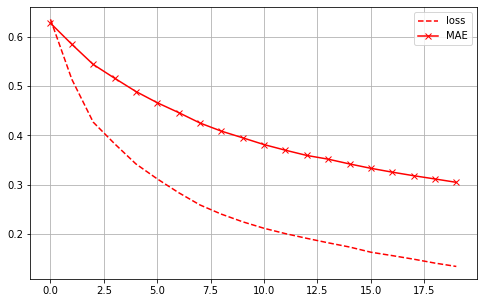

(-0.5562875688014095, 0.15216697039131633)


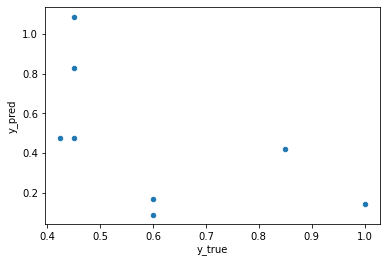

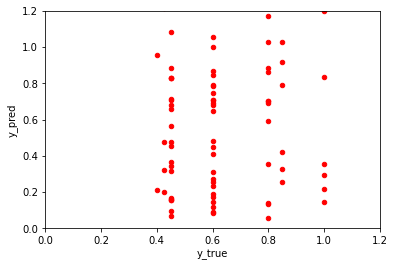

współczynnik R: 0.26


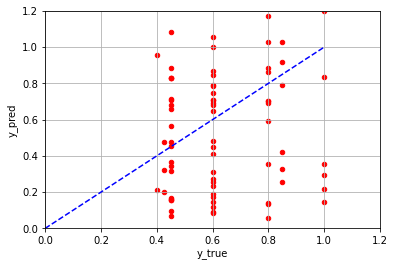

In [ ]:
plot_hist(history4)
plot_sc(model1 = model4)
plot_sc_all(model_ = model4)
plot_sc_all2(model4)

In [ ]:
model3.compile(loss = 'mean_squared_error',
             optimizer = 'sgd',
             metrics = ["MAE"])

In [ ]:
"""model3.compile(loss = 'mean_squared_error',
             optimizer = keras.optimizers.SGD(lr = 1e-3),
             metrics = ["MAE"])"""

'model3.compile(loss = \'mean_squared_error\',\n             optimizer = keras.optimizers.SGD(lr = 1e-3),\n             metrics = ["MAE"])'

In [ ]:
history3 = model3.fit(X_train, y_train, epochs = 500,
                    validation_split = 0.2, shuffle = True)

Epoch 1/500
2/2 [==============================] - 0s 47ms/step - loss: 0.4941 - MAE: 0.6012 - val_loss: 0.3512 - val_MAE: 0.4604
Epoch 2/500
2/2 [==============================] - 0s 8ms/step - loss: 0.4387 - MAE: 0.5680 - val_loss: 0.3391 - val_MAE: 0.4428
Epoch 3/500
2/2 [==============================] - 0s 8ms/step - loss: 0.3986 - MAE: 0.5430 - val_loss: 0.3304 - val_MAE: 0.4288
Epoch 4/500
2/2 [==============================] - 0s 8ms/step - loss: 0.3611 - MAE: 0.5155 - val_loss: 0.3217 - val_MAE: 0.4147
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 0.3286 - MAE: 0.4935 - val_loss: 0.3141 - val_MAE: 0.4017
Epoch 6/500
2/2 [==============================] - 0s 8ms/step - loss: 0.3013 - MAE: 0.4722 - val_loss: 0.3065 - val_MAE: 0.3898
Epoch 7/500
2/2 [==============================] - 0s 8ms/step - loss: 0.2773 - MAE: 0.4524 - val_loss: 0.3001 - val_MAE: 0.3786
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 0.2579 - MAE: 0.4348 - va

2/2 [==============================] - 0s 8ms/step - loss: 0.0481 - MAE: 0.1719 - val_loss: 0.1808 - val_MAE: 0.3053
Epoch 65/500
2/2 [==============================] - 0s 8ms/step - loss: 0.0475 - MAE: 0.1710 - val_loss: 0.1798 - val_MAE: 0.3047
Epoch 66/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0472 - MAE: 0.1701 - val_loss: 0.1792 - val_MAE: 0.3052
Epoch 67/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0465 - MAE: 0.1689 - val_loss: 0.1784 - val_MAE: 0.3052
Epoch 68/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0462 - MAE: 0.1684 - val_loss: 0.1779 - val_MAE: 0.3058
Epoch 69/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0456 - MAE: 0.1670 - val_loss: 0.1770 - val_MAE: 0.3054
Epoch 70/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0452 - MAE: 0.1662 - val_loss: 0.1764 - val_MAE: 0.3055
Epoch 71/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0447 - MAE: 0.1653 - val_loss

Epoch 127/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0306 - MAE: 0.1310 - val_loss: 0.1453 - val_MAE: 0.2860
Epoch 128/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0305 - MAE: 0.1305 - val_loss: 0.1449 - val_MAE: 0.2855
Epoch 129/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0303 - MAE: 0.1301 - val_loss: 0.1446 - val_MAE: 0.2853
Epoch 130/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0302 - MAE: 0.1297 - val_loss: 0.1441 - val_MAE: 0.2847
Epoch 131/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0300 - MAE: 0.1293 - val_loss: 0.1436 - val_MAE: 0.2842
Epoch 132/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0299 - MAE: 0.1292 - val_loss: 0.1433 - val_MAE: 0.2841
Epoch 133/500
2/2 [==============================] - 0s 6ms/step - loss: 0.0298 - MAE: 0.1287 - val_loss: 0.1427 - val_MAE: 0.2832
Epoch 134/500
2/2 [==============================] - 0s 6ms/step - loss: 0.0296 - M

2/2 [==============================] - 0s 7ms/step - loss: 0.0209 - MAE: 0.1034 - val_loss: 0.1155 - val_MAE: 0.2520
Epoch 252/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0209 - MAE: 0.1033 - val_loss: 0.1153 - val_MAE: 0.2517
Epoch 253/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0210 - MAE: 0.1035 - val_loss: 0.1149 - val_MAE: 0.2509
Epoch 254/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0208 - MAE: 0.1033 - val_loss: 0.1149 - val_MAE: 0.2510
Epoch 255/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0208 - MAE: 0.1030 - val_loss: 0.1148 - val_MAE: 0.2508
Epoch 256/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0207 - MAE: 0.1029 - val_loss: 0.1146 - val_MAE: 0.2504
Epoch 257/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0207 - MAE: 0.1029 - val_loss: 0.1144 - val_MAE: 0.2503
Epoch 258/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0207 - MAE: 0.1028 - v

2/2 [==============================] - 0s 7ms/step - loss: 0.0171 - MAE: 0.0930 - val_loss: 0.1029 - val_MAE: 0.2333
Epoch 376/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0171 - MAE: 0.0929 - val_loss: 0.1028 - val_MAE: 0.2329
Epoch 377/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0170 - MAE: 0.0930 - val_loss: 0.1027 - val_MAE: 0.2327
Epoch 378/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0170 - MAE: 0.0929 - val_loss: 0.1027 - val_MAE: 0.2329
Epoch 379/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0170 - MAE: 0.0930 - val_loss: 0.1027 - val_MAE: 0.2330
Epoch 380/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0170 - MAE: 0.0929 - val_loss: 0.1026 - val_MAE: 0.2329
Epoch 381/500
2/2 [==============================] - 0s 6ms/step - loss: 0.0169 - MAE: 0.0926 - val_loss: 0.1025 - val_MAE: 0.2328
Epoch 382/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0169 - MAE: 0.0927 - v

2/2 [==============================] - 0s 7ms/step - loss: 0.0149 - MAE: 0.0887 - val_loss: 0.0953 - val_MAE: 0.2193
Epoch 500/500
2/2 [==============================] - 0s 7ms/step - loss: 0.0149 - MAE: 0.0887 - val_loss: 0.0952 - val_MAE: 0.2190


## DO EXCELA -_- i brudnopis

In [ ]:
"DO EXCELA"
pd.DataFrame.from_dict({"y_pred": y_pred,
"y_true": y_true}).to_excel("outputa.xlsx")

In [ ]:
hidden1_ = keras.layers.Dense(8, activation = 'relu')(input_)
hidden2_ = keras.layers.Dense(4, activation = 'relu')(hidden1_)
współczynnik R: 0.73
loss: 0.0177 - MAE: 0.0967 - val_loss: 0.0189 - val_MAE: 0.1220 

współczynnik R: 0.69
loss: 0.0102 - MAE: 0.0732

współczynnik R: 0.76
loss: 0.0132 - MAE: 0.0836 - val_loss: 0.0153 - val_MAE: 0.1080
                
współczynnik R: 0.8
loss: 0.0120 - MAE: 0.0870 + dane bez 54 i 56

In [ ]:
history3.history.keys()

dict_keys(['loss', 'MAE', 'val_loss', 'val_MAE'])

In [ ]:
X_train

array([[-9.35684378e-01,  6.68472755e-01, -1.04257207e+00,
        -5.71428571e-01,  1.44115338e+00,  2.86909095e+00,
        -1.40647737e+00, -1.34044852e+00, -1.30812470e+00,
        -4.40769288e+00, -9.94405766e-01,  9.05922566e-01],
       [ 1.69079809e+00, -5.78742543e-01,  6.95048047e-02,
         5.00000000e-01,  1.44115338e+00, -5.77264545e-01,
        -1.40647737e+00, -1.34044852e+00, -4.74924253e-01,
         3.74343810e-01,  4.36393897e-01, -2.88438101e-01],
       [ 3.77556854e-01, -5.09452804e-01,  1.18158168e+00,
        -5.71428571e-01,  1.44115338e+00, -5.77264545e-01,
         1.03691437e+00,  7.09950744e-01, -1.30812470e+00,
         4.93894727e-01, -2.79005934e-01,  1.41531739e-01],
       [-9.35684378e-01,  8.76341971e-01,  6.95048047e-02,
        -5.71428571e-01, -6.93888666e-01, -5.77264545e-01,
         1.03691437e+00,  7.09950744e-01, -4.74924253e-01,
         4.93894727e-01,  1.86719356e+00,  4.28178299e-01],
       [ 3.77556854e-01, -1.06377071e+00, -1.0425720

In [ ]:
history.__dict__

{'validation_data': None,
 'model': <tensorflow.python.keras.engine.sequential.Sequential at 0x25779b3c220>,
 '_chief_worker_only': None,
 '_supports_tf_logs': False,
 'history': {'loss': [0.7174222469329834,
   0.5683904886245728,
   0.45610177516937256,
   0.3672577738761902,
   0.2973271310329437,
   0.24375903606414795,
   0.20533277094364166,
   0.17284613847732544,
   0.14804472029209137,
   0.1289183497428894,
   0.11476979404687881,
   0.10341423004865646,
   0.093894824385643,
   0.08619829267263412,
   0.0807400494813919,
   0.07601331174373627,
   0.07136454433202744,
   0.06785756349563599,
   0.06529957056045532,
   0.06321681290864944,
   0.06113122031092644,
   0.059588365256786346,
   0.05785553157329559,
   0.05652310699224472,
   0.055016931146383286,
   0.05374247208237648,
   0.05260297283530235,
   0.05170762538909912,
   0.05052926391363144,
   0.049678049981594086,
   0.048931680619716644,
   0.048271581530570984,
   0.047457318753004074,
   0.04660976305603981,


In [ ]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 32}

In [ ]:
# tf.keras.utils.plot_model(model, "my_ssn.png", show_shapes=True)

## NORMALIZATION LAYER

In [ ]:
X_train, X_test, y_train, y_test

In [ ]:
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

In [ ]:
norm_layer.adapt(X_train.to_numpy())

In [ ]:
norm_layer(X_train)

<tf.Tensor: shape=(72, 12), dtype=float32, numpy=
array([[-1.0482652 ,  0.73076844, -1.114172  , -0.5686104 ,  1.371131  ,
         2.7116847 , -1.4023348 , -1.3352537 , -1.31131   , -4.180825  ,
        -1.0199231 ,  0.87262726],
       [ 1.9115418 , -0.55409974,  0.        ,  0.4634892 ,  1.371131  ,
        -0.620078  , -1.4023348 , -1.3352537 , -0.44868487,  0.37921032,
         0.36825195, -0.3218434 ],
       [ 0.43163827, -0.48271823,  1.114172  , -0.5686104 ,  1.371131  ,
        -0.620078  ,  1.0365083 ,  0.68233854, -1.31131   ,  0.4932111 ,
        -0.3258356 ,  0.10816609],
       [-1.0482652 ,  0.94491327,  0.        , -0.5686104 , -0.72932494,
        -0.620078  ,  1.0365083 ,  0.68233854, -0.44868487,  0.4932111 ,
         1.756427  ,  0.39483902],
       [ 0.43163827, -1.053771  , -1.114172  , -0.5686104 ,  1.371131  ,
         1.0458033 , -0.79262406, -0.83085567,  1.0609093 ,  0.03720796,
         1.756427  , -1.0385258 ],
       [-1.0482652 ,  0.23109753, -1.114172  

In [ ]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) /2 
    linear_loss = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

In [ ]:
model4 = keras.models.Sequential([
    norm_layer,
    keras.layers.Dense(5, activation = 'relu'),
    keras.layers.Dense(1)])

model4.compile(loss = 'mean_squared_error',
             optimizer = 'sgd',
             metrics = ["MAE"])

history4 = model4.fit(X_train.to_numpy(), y_train.to_numpy(), epochs = 40,
                    validation_split = 0.2, shuffle = True)

Epoch 1/40
2/2 [==============================] - 1s 327ms/step - loss: 2.0508 - MAE: 1.3195 - val_loss: 1.7182 - val_MAE: 1.1977
Epoch 2/40
2/2 [==============================] - 0s 53ms/step - loss: 1.5957 - MAE: 1.1530 - val_loss: 1.3713 - val_MAE: 1.0490
Epoch 3/40
2/2 [==============================] - 0s 58ms/step - loss: 1.2688 - MAE: 1.0159 - val_loss: 1.1226 - val_MAE: 0.9386
Epoch 4/40
2/2 [==============================] - 0s 57ms/step - loss: 1.0263 - MAE: 0.9074 - val_loss: 0.9328 - val_MAE: 0.8481
Epoch 5/40
2/2 [==============================] - 0s 59ms/step - loss: 0.8475 - MAE: 0.8135 - val_loss: 0.7916 - val_MAE: 0.7719
Epoch 6/40
2/2 [==============================] - 0s 66ms/step - loss: 0.7096 - MAE: 0.7357 - val_loss: 0.6819 - val_MAE: 0.7058
Epoch 7/40
2/2 [==============================] - 0s 63ms/step - loss: 0.6007 - MAE: 0.6695 - val_loss: 0.5951 - val_MAE: 0.6476
Epoch 8/40
2/2 [==============================] - 0s 56ms/step - loss: 0.5150 - MAE: 0.6148 - va

### SIMPLE PIPELINE - sklearn + tensorflow `(imput scaler - net - output scaler)`

In [ ]:
lista # kernel_initializer = 'he_normal'

[0.07, 0.46, 0.39, 0.23, 0.46, 0.3, 0.18, 0.35, 0.05, 0.21]

In [ ]:
lista #selu + lecun_normal

[0.28, 0.18, 0.7, -0.26, 0.6, 0.46, 0.29]

In [ ]:
lista #selu + lecun_normal

[0.72, 0.56, 0.56, 0.55, 0.35, 0.37, 0.16]

In [ ]:
lista # obcinanie gradientów

[0.12, 0.45, 0.34, 0.56, 0.54, 0.25, 0.64]

In [ ]:
lista #optimizer = keras.optimizers.SGD(lr=0.001, momentum = 0.9)

[0.49, 0.27, 0.38, -0.03, 0.44, 0.17, 0.16]

In [ ]:
lista

[0.22, -0.15, 0.33, -0.08, 0.44, 0.38, 0.61]

In [ ]:
lista

[0.2, 0.23, 0.09, 0.12, 0.47, -0.2, 0.07]

In [ ]:
lista # optimizers.SGD(lr=0.01, momentum = 0.9, nesterov = True)

[0.67, 0.6, 0.64, 0.62, 0.37, 0.72, 0.6]

In [ ]:
lista #momentum = 0.9, nesterov = True)

[0.46, 0.16, 0.43, 0.68, 0.45, 0.65, 0.33]

In [ ]:
lista #keras.optimizers.RMSprop(lr = 0.01, rho = 0.9)

[0.78, 0.78, 0.43, 0.74, 0.89, 0.79, 0.78]

In [ ]:
lista # keras.optimizers.Adam(lr = 0.01, beta_1=0.9, beta_2 = 0.999)

[0.92, 0.76, 0.69, 0.89, -0.13, 0.68, 0.83]

In [ ]:
"""    optimizer = keras.optimizers.Adam(lr = 0.01, beta_1=0.9, beta_2 = 0.999)
    model.compile(loss = huber_fn,"""
[0.82, 0.78, 0.83, 0.69, 0.76, 0.72, 0.81] 0.773

In [ ]:
"""    optimizer = keras.optimizers.Adam(lr = 0.01, beta_1=0.9, beta_2 = 0.999)
    model.compile(loss = huber_fn,
                 optimizer = optimizer,
                 metrics = ["MAE"])
    history = model.fit(X_train, y_train, epochs = 50,
                        validation_split = 0.2, shuffle = True, verbose=0)"""

[0.8, 0.69, 0.72, 0.78, 0.68, 0.87, 0.72, 0.77, 0.72, 0.62] 0.737 [6, 5, 1]
[0.48, 0.67, 0.71, 0.68, 0.7, 0.48, 0.49, 0.8, 0.6, 0.85] średnia:  0.646 max:  0.85 struktura:  [6, 5, 1]
[0.74, 0.68, 0.83, 0.74, 0.77, 0.79, 0.74, 0.75, 0.83, 0.77] średnia:  0.764 max:  0.83 struktura:  [6, 5, 1]

Text(0.5, 1.0, 'Huber loss')

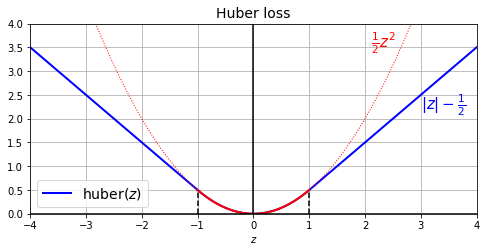

In [ ]:
plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
z_center = np.linspace(-1, 1, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z ** 2 / 2, "r:", linewidth=1)
plt.plot(z_center, z_center ** 2 / 2, "r", linewidth=2)
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "k--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "k--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.text(2.1, 3.5, r"$\frac{1}{2}z^2$", color="r", fontsize=15)
plt.text(3.0, 2.2, r"$|z| - \frac{1}{2}$", color="b", fontsize=15)
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '[6, 6, 1]'),
  Text(1, 0, '[6, 6, 1]'),
  Text(2, 0, '[6, 6, 1]'),
  Text(3, 0, '[7, 7, 1]'),
  Text(4, 0, '[7, 7, 1]'),
  Text(5, 0, '[7, 7, 1]'),
  Text(6, 0, '[8, 8, 1]'),
  Text(7, 0, '[8, 8, 1]'),
  Text(8, 0, '[8, 8, 1]'),
  Text(9, 0, '[9, 9, 1]')])

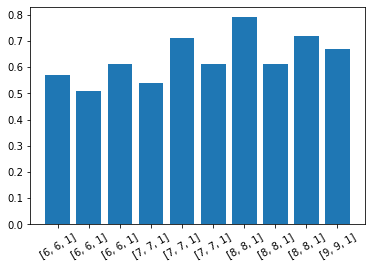

In [ ]:
plt.bar(x = range(10), height = np.array(ttt).max(axis=-1).round(decimals=2), tick_label = zzz)
plt.xticks(rotation=30)

# Pre-prepared network aka `2018`

In [ ]:
import joblib

new_model = tf.keras.models.load_model('ANNmodel')
out_ = joblib.load('scaler2.pkl')
in_ = joblib.load('scalerMinMax.pkl')
data = pd.read_excel("SNN.xls",header = None, sheet_name= 1)

def SSN_CRFp(data, input_scaler, output_scaler, model, flatten = True):
    predict_ = output_scaler.inverse_transform(model.predict(input_scaler.transform(data))).round(5)
    if flatten:
        return predict_.flatten()
    else:
        return predict_   

SSN_CRFp(data_p, in_, out_,new_model)

NameError: name 'date_p' is not defined

In [ ]:
in_ = joblib.load('scalerMinMax.pkl')

# EXTRA TOOL'S `from my_tools.py`

#### #_1 KEEP OUTPUTS IN PANDAS AND PICKLE

In [1]:
from my_tools import hold_data

In [2]:
list_output = hold_data()

In [3]:
list_output.add_out(*['net1',0.5,None,'txt',None,'Test'])

Added:  ['net1', 0.5, None, 'txt', None, 'Test']


In [4]:
list_output.print_()

    NET  MAX_MSE TUNER_KERAS OTHER EXTRAS#1 EXTRAS#2
0  net1      0.5        None   txt     None     Test


In [ ]:
list_output.save_to_file('test')

INFO:tensorflow:Assets written to: ram://83ad7620-b0c3-4e36-8eb2-899cdf966e14/assets


In [ ]:
# open pickle
with open('test.pickle', 'rb') as f:
    print(pickle.load(f))

FileNotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ram://424c5292-c4d7-403c-9dac-c83de8a4a195/variables/variables
 You may be trying to load on a different device from the computational device. Consider setting the `experimental_io_device` option in `tf.saved_model.LoadOptions` to the io_device such as '/job:localhost'.

#### #_2 

In [ ]:
# TRAIN SUBCLASS MODEL TO CHECK MEAN AND MAX r VALUE

In [ ]:
def net1_(NEURONS: int) -> tf.keras.Model:
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(NEURONS, activation = 'relu', input_shape = (12,)))
    model.add(keras.layers.Dense(NEURONS, activation = 'relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate = 0.01, beta_1=0.9, beta_2 = 0.999)
    model.compile(loss = "MSE",
                 optimizer = optimizer,
                 metrics = ["MAE"])
    return model

 # plot_train_via_neurons:                   

In [ ]:
test_ = plot_train_via_neurons(net1_, scalerMinMax, (data_p, CRFp))

In [ ]:
# 13.5 s, 7.9; 10,7

[0.18039527472362002, 0.3011468600187295, 0.6243753201967013] średnia:  0.369 max:  0.624 struktura:  [6, 6, 1]
[0.47635612984629727, -0.18222008493253042, 0.6587259919861549] średnia:  0.318 max:  0.659 struktura:  [7, 7, 1]
[0.3152124748346157, 0.2517178108954278, 0.6976124028593239] średnia:  0.422 max:  0.698 struktura:  [8, 8, 1]
[0.6297317045332116, 0.45346077559155423, 0.5611084025711703] średnia:  0.548 max:  0.63 struktura:  [9, 9, 1]


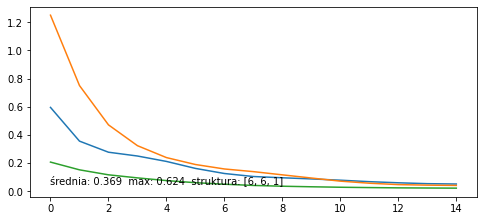

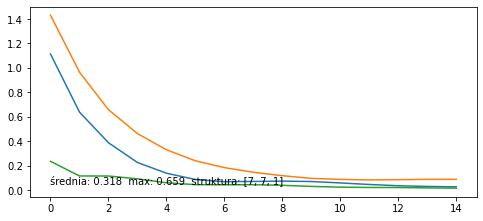

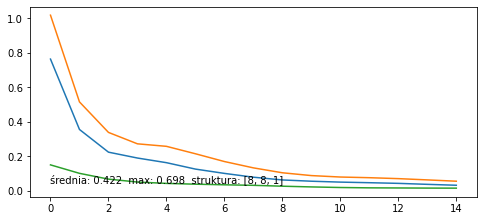

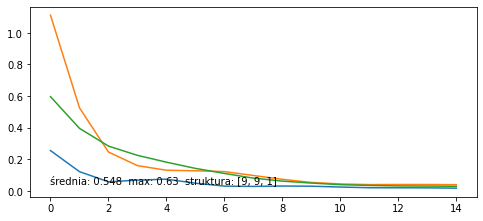

In [ ]:
test_.compute(X_train, y_train, epochs = 15, validation_split = 0.2, shuffle = True, verbose=0)

##### boxplot

In [ ]:
# + boxplot version
# for checking the distribution

def net1_(NEURONS: int) -> tf.keras.Model:
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(NEURONS, activation = 'relu', input_shape = (12,)))
    model.add(keras.layers.Dense(NEURONS, activation = 'relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate = 0.01, beta_1=0.9, beta_2 = 0.999)
    model.compile(loss = "MSE",
                 optimizer = optimizer,
                 metrics = ["MAE"])
    return model

                    


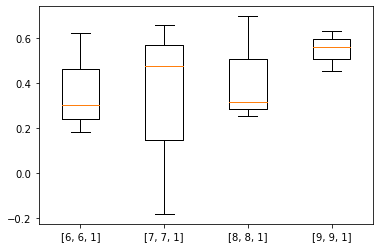

In [ ]:
test_.plot_box() 

In [ ]:
#warning, manual set n neurons,
#checker_dist_box(plot_box_via_neurons):


In [ ]:
test1 = checker_dist_box(net1_, scalerMinMax, (data_p, CRFp))

In [ ]:
test1.compute(
    X_train, y_train, 
    epochs = 15, 
    validation_split = 0.2, 
    shuffle = True, 
    verbose=0,
    neurons = 3
    )

[0.15432124005243916, 0.4223900986783363, 0.3199089433286312, 0.39635989841025965, 0.29451503755505404, -0.08159532638048461, 0.04907380572673374, 0.5017050129194488, -0.19597923577208046, 0.3846141416087609] średnia:  0.225 max:  0.502 struktura:  [3, 3, 1]  !Coef Pearson


<Figure size 576x252 with 0 Axes>

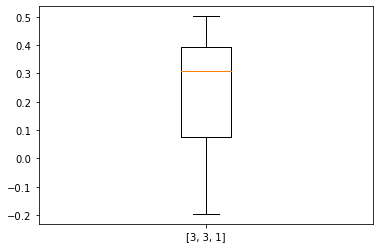

In [ ]:
test1.plot_box